In [1]:
#import everything and set dpi here

import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100 #set dpi of figs for entire notebook

In [ ]:
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()

wave_dir = filedialog.askdirectory()

In [2]:
# load simba output
simbaresultpath = r"C:/Users/njana/Desktop/test/D1T1.csv"

simbarawdata = pd.read_csv(simbaresultpath, header = 0)

behavdata = simbarawdata[["Probability_Aggression","Aggression",	
                "Probability_Mounting",	"Mounting", 
                "Probability_Following",	"Following",	
                "Probability_Dominate",	"Dominate",	
                "Probability_Social_contact",	"Social_contact",	
                "Probability_Asocial",	"Asocial",	
                "Probability_Passive",	"Passive",	
                "Probability_Rest_move",	"Rest_move"]]

In [3]:
# load corresponding ethovision export

ethoexportpath = r"C:/Users/njana/Desktop/ethotrigs/day 1/Hardware-Mar2223-Trial     1-Arena 1.txt"
ethoexport = pd.read_csv(ethoexportpath, sep = ';', header = 37) # so stupid that this works but it does

input1 = ethoexport.loc[ethoexport["Name"] == "Is input 1 High"]
input1high = input1.loc[input1["Value"] == 1]
input1 = input1.drop(columns = ['Trial time', 'Device', 'Command/Signal', 'Unnamed: 6'])
input1high = input1high.drop(columns = ['Trial time', 'Device', 'Command/Signal', 'Unnamed: 6'])

input2 = ethoexport.loc[ethoexport["Name"] == "Is input 2 High"]
input2high = input2.loc[input2["Value"] == 1]
input2 = input2.drop(columns = ['Trial time', 'Device', 'Command/Signal', 'Unnamed: 6'])
input2high = input2high.drop(columns = ['Trial time', 'Device', 'Command/Signal', 'Unnamed: 6'])

In [30]:
stimtimes = input2high["Recording time"].to_numpy()
stimtimes = np.asarray(stimtimes, dtype=float)

truncated = 5469 # for d1t1

fps = 30
timetrunc = truncated/fps
stimtimes = stimtimes - timetrunc

In [40]:
div = 1/fps
stimstartidx = np.around(stims*fps).astype("int")

stimdur = 30 #in seconds
stimidxdur = stimdur*fps
stimendidx = stimstartidx + stimidxdur

stim = np.zeros(behavdata[behavdata.columns[0]].shape[0])

for i in range(stimstartidx.shape[0]):
    stim[stimstartidx[i]:stimendidx[i]] = 1

Text(0.225, 0.92, 'Resident A03: Day 1')

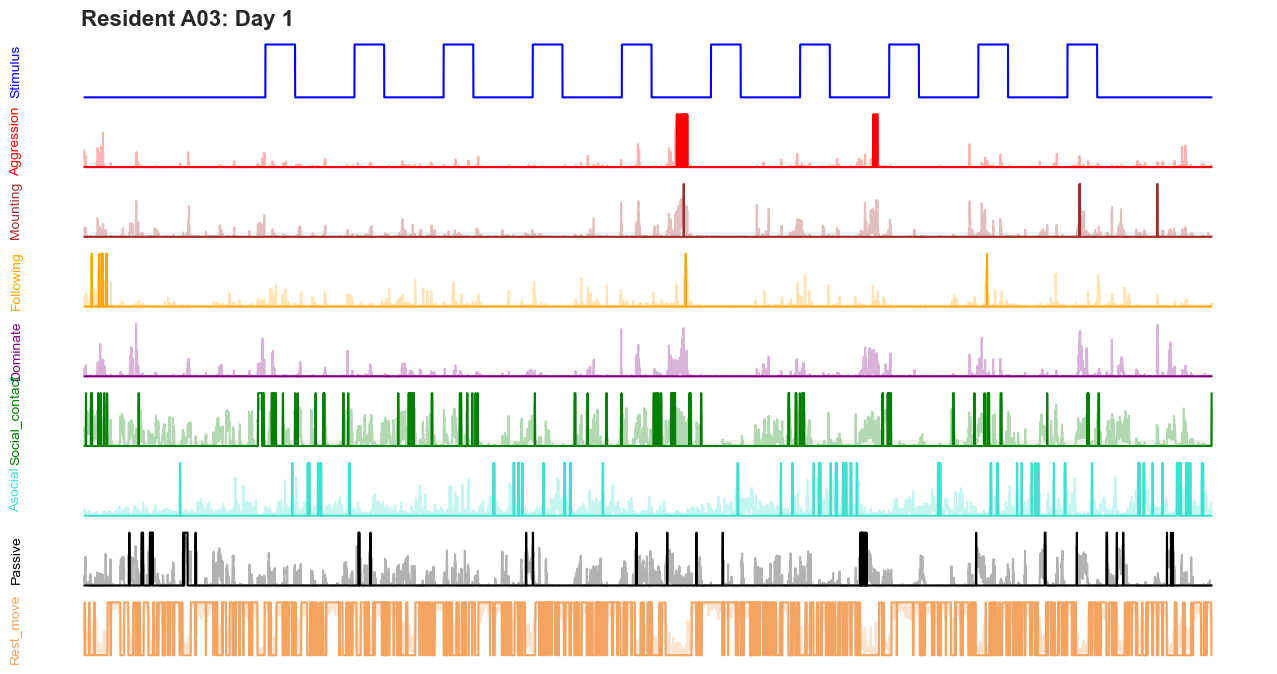

In [47]:
Mouse = "A03"
day = "1"

fps = 30
time = np.arange(0,behavdata[behavdata.columns[0]].shape[0])/fps

counter = 0
colors = ["red","brown","orange","purple","green","turquoise","black","sandybrown"]
sns.set_style("white")


#plt.subplots_adjust(hspace=0)

plt.subplot(9,1,1)
plt.plot(time,stim, color = 'blue')
plt.ylabel("Stimulus", color = 'blue')
plt.gca().set_xticks([]) 
plt.gca().set_yticks([])

for i in range(8):
    plt.subplot(9,1,i+2)
    plt.plot(time,behavdata[behavdata.columns[counter]],  color = colors[i], alpha = 0.3)
    counter += 1
    plt.plot(time,behavdata[behavdata.columns[counter]], color = colors[i], alpha = 1)
    plt.ylabel(behavdata.columns[counter], color = colors[i])
    plt.gca().set_xticks([]) 
    plt.gca().set_yticks([])
    sns.despine(bottom = True, left = True)
    counter += 1   
    
plt.gcf().set_size_inches(16,8)
plt.gcf().suptitle("Resident "+Mouse+": Day "+day,x = 0.225, y = 0.92, fontsize = 16, fontweight = "bold")

#plt.savefig(Mouse+"D"+day+".svg", dpi = 500)
#plt.savefig(Mouse+"D"+day+".png", dpi = 500)